¡Hola, Luis!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

# ¿Qué cliente es potencial a dejar el banco?
---
El banco Beta Bank descubrió que sus clientes están abandonando el banco y que es más fácil salvarlos que captar clientes nuevos.  
Crearemos un modelo de calidad que sea capaz de predecir cúal cliente está a punto de abandonar el banco.

## Análisis y formateo de datos

In [1]:
# Importar Pandas y Cargar datos
import pandas as pd
df = pd.read_csv('/datasets/Churn.csv')


In [2]:
# Examinar datos
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [3]:
# Estudiar datos
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo tanto con la carga de librerías y datos como con la exploración inicial de la información.

In [4]:
# Limpieza y formateo de datos

# Convertir en minúsculas
df.columns = df.columns.str.lower()
df['geography'] = df['geography'].str.lower()
df['gender'] = df['gender'].str.lower()

# Cambiamos valores ausentes -1
df['tenure'] = df['tenure'].fillna(-1)

# Cambiar tipo de datos
df['tenure'] = df['tenure'].astype('int')

# Eliminar columnas que no se necesitan para el entrenamiento del modelo
df = df.drop(['rownumber', 'customerid', 'surname'], axis=1)

# Imprimimos prueba de cambios
df.sample(2)


,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
6141,572,france,male,24,1,0.00,2,1,1,151460.84,0
2828,527,spain,male,33,9,132168.28,1,0,0,98734.15,0


### Codificación, segmentación y estandarización de datos

In [5]:
# Codificación de datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Aplicamos categorización One-Hot
df_ohe = pd.get_dummies(df, drop_first=True)

# Segmentamos los datos en entrenamiento, validación y prueba
random = 23451
df_train, df_valid = train_test_split(df_ohe, test_size=0.40, random_state=random)
df_valid, df_test = train_test_split(df_valid, test_size=0.50, random_state=random)

features_train = df_train.drop(['exited'], axis=1)
target_train = df_train['exited']
features_valid = df_valid.drop(['exited'], axis=1)
target_valid = df_valid['exited']
features_test = df_test.drop(['exited'], axis=1)
target_test = df_test['exited']

# Estandarización de datos
numeric = ['creditscore', 'age', 'tenure', 'balance', 'estimatedsalary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo codificando las variables categóricas y dividiendo los datos en los conjuntos de entrenamiento, prueba y validación.
</div>

## Entrenamiento de modelos

In [6]:
# Cargamos librerías
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [7]:
# Investigamos que desequilibrio tenemos
print("Distribución original:")
print(target_train.value_counts())
print("Proporción:", target_train.value_counts(normalize=True).round(4))


Distribución original:
0    4804
1    1196
Name: exited, dtype: int64
Proporción: 0    0.8007
1    0.1993
Name: exited, dtype: float64


In [8]:
# Creación de función 'upsample'

def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=random)
    
    return features_upsampled, target_upsampled


### Árbol de decisión

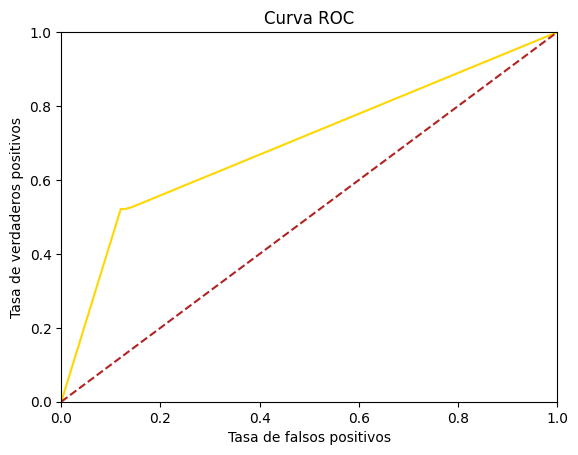

El f1_score del modelo en el conjunto de validación fue: 0.603 con una (max_depth = 8).
El score de la curva ROC de este modelo en el conjunto de validación es: 0.6975

CPU times: user 503 ms, sys: 0 ns, total: 503 ms
Wall time: 502 ms


In [9]:
%%time
# Árbol de decisión DESEQUILIBRADO

best_score_tree = 0
best_depth = 0
for depth in range(1, 21):
    model = DecisionTreeClassifier(random_state=random, max_depth = depth)
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    f1_score_tree = f1_score(target_valid, predicted_valid)
    if f1_score_tree > best_score_tree:
        best_score_tree = f1_score_tree
        best_depth = depth

# Calculamos el roc_auc_score
probabilities_valid_tree = model.predict_proba(features_valid)
probabilities_one_valid_tree = probabilities_valid_tree[:, 1]
auc_roc_tree = roc_auc_score(target_valid, probabilities_one_valid_tree)

# Graficamos el comportamiento de la curva ROC
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid_tree)
plt.figure()
plt.plot(fpr,tpr, color='gold')
plt.plot([0, 1], [0, 1], linestyle='--', color='firebrick')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.show()

f1_tree_des = best_score_tree.round(4)
auc_roc_tree_des = auc_roc_tree.round(4)

print("El f1_score del modelo en el conjunto de validación fue: {} con una (max_depth = {}).".format(f1_tree_des, best_depth))
print("El score de la curva ROC de este modelo en el conjunto de validación es:", auc_roc_tree_des)
print()

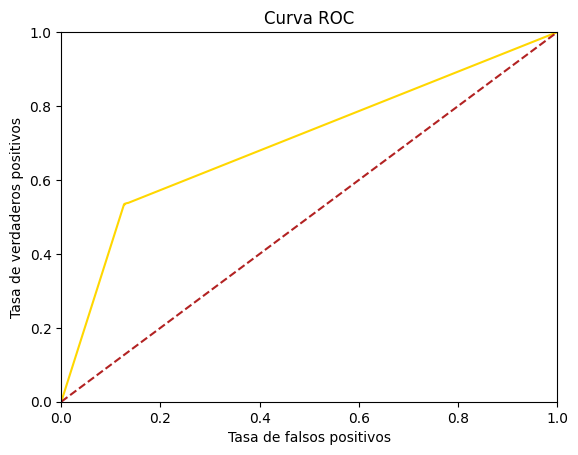

El f1_score del modelo en el conjunto de validación fue: 0.6098 con una (max_depth = 7).
El score de la curva ROC de este modelo en el conjunto de validación es: 0.7035

CPU times: user 472 ms, sys: 10.1 ms, total: 482 ms
Wall time: 481 ms


In [10]:
%%time
# Árbol de decisión BALANCEADO

# Entrenamos modelo con class_weight='balanced'
best_score_tree = 0
best_depth = 0
for depth in range(1, 21):
    model = DecisionTreeClassifier(random_state=random, max_depth = depth, class_weight='balanced')
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    f1_score_tree = f1_score(target_valid, predicted_valid)
    if f1_score_tree > best_score_tree:
        best_score_tree = f1_score_tree
        best_depth = depth

# Calculamos el roc_auc_score
probabilities_valid_tree = model.predict_proba(features_valid)
probabilities_one_valid_tree = probabilities_valid_tree[:, 1]
auc_roc_tree = roc_auc_score(target_valid, probabilities_one_valid_tree)

# Graficamos el comportamiento de la curva ROC
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid_tree)
plt.figure()
plt.plot(fpr,tpr, color='gold')
plt.plot([0, 1], [0, 1], linestyle='--', color='firebrick')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.show()

f1_tree_balanced = best_score_tree.round(4)
auc_roc_tree_balanced = auc_roc_tree.round(4)

print("El f1_score del modelo en el conjunto de validación fue: {} con una (max_depth = {}).".format(f1_tree_balanced, best_depth))
print("El score de la curva ROC de este modelo en el conjunto de validación es:", auc_roc_tree_balanced)
print()

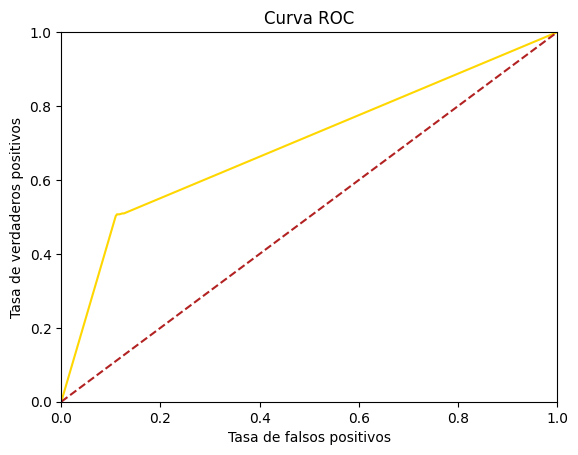

El f1_score del modelo en el conjunto de validación fue: 0.6019 con una (max_depth = 7).
El score de la curva ROC de este modelo en el conjunto de validación es: 0.6954

CPU times: user 867 ms, sys: 0 ns, total: 867 ms
Wall time: 866 ms


In [11]:
%%time
# Árbol de decisión SOBREMUESTREO

# Buscamos el mejor 'repeat' para el árbol de decisión
repeat_values_tree = [5, 6, 7, 8, 9, 10]
best_f1_tree = 0
best_repeat_tree = 1

for repeat_tree in repeat_values_tree:
    features_up, target_up = upsample(features_train, target_train, repeat_tree)
    model = DecisionTreeClassifier(random_state=random)
    model.fit(features_up, target_up)
    predicted = model.predict(features_valid)
    f1 = f1_score(target_valid, predicted)
    if f1 > best_f1_tree:
        best_f1_tree = f1
        best_repeat_tree = repeat_tree

# Creamos conjunto 'upsampled_tree'
features_upsampled_tree, target_upsampled_tree = upsample(features_train, target_train, best_repeat_tree)

# Entrenamos modelo 'upsample'
best_score_tree = 0
best_depth = 0
for depth in range(1, 21):
    model = DecisionTreeClassifier(random_state=random, max_depth = depth)
    model.fit(features_upsampled_tree, target_upsampled_tree)
    predicted_valid = model.predict(features_valid)
    f1_score_tree = f1_score(target_valid, predicted_valid)
    if f1_score_tree > best_score_tree:
        best_score_tree = f1_score_tree
        best_depth = depth

# Calculamos el roc_auc_score
probabilities_valid_tree = model.predict_proba(features_valid)
probabilities_one_valid_tree = probabilities_valid_tree[:, 1]
auc_roc_tree = roc_auc_score(target_valid, probabilities_one_valid_tree)

# Graficamos el comportamiento de la curva ROC
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid_tree)
plt.figure()
plt.plot(fpr,tpr, color='gold')
plt.plot([0, 1], [0, 1], linestyle='--', color='firebrick')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.show()

f1_tree_upsampled = best_score_tree.round(4)
auc_roc_tree_upsampled = auc_roc_tree.round(4)

print("El f1_score del modelo en el conjunto de validación fue: {} con una (max_depth = {}).".format(f1_tree_upsampled, best_depth))
print("El score de la curva ROC de este modelo en el conjunto de validación es:", auc_roc_tree_upsampled)
print()

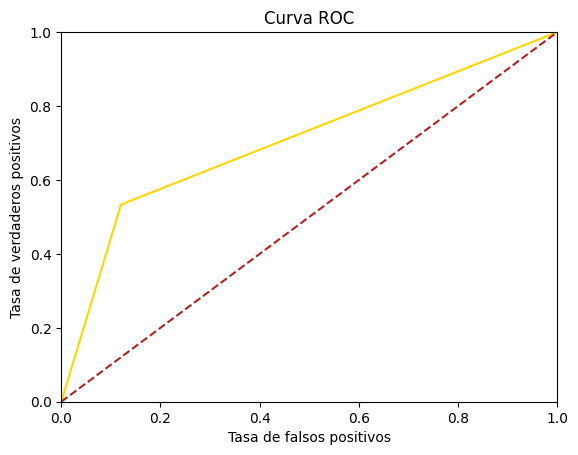

El f1_score del modelo en el conjunto de validación fue: 0.6117 con una (max_depth = 7).
El score de la curva ROC de este modelo en el conjunto de validación es: 0.7066

CPU times: user 886 ms, sys: 4.58 ms, total: 891 ms
Wall time: 890 ms


In [12]:
%%time
# Árbol de decisión COMBINADO

# Buscamos el mejor 'repeat' para el árbol de decisión
repeat_values_tree = [5, 6, 7, 8, 9, 10]
best_f1_tree = 0
best_repeat_tree = 1

for repeat_tree in repeat_values_tree:
    features_up, target_up = upsample(features_train, target_train, repeat_tree)
    model = DecisionTreeClassifier(random_state=random)
    model.fit(features_up, target_up)
    predicted = model.predict(features_valid)
    f1 = f1_score(target_valid, predicted)
    if f1 > best_f1_tree:
        best_f1_tree = f1
        best_repeat_tree = repeat_tree

# Creamos conjunto 'upsampled_tree' con class_weight='balanced'
features_upsampled_tree, target_upsampled_tree = upsample(features_train, target_train, best_repeat_tree)

# Entrenamos modelo 'upsample' con class_weight='balanced'
best_score_tree = 0
best_depth = 0
for depth in range(1, 21):
    model = DecisionTreeClassifier(random_state=random, max_depth = depth, class_weight='balanced')
    model.fit(features_upsampled_tree, target_upsampled_tree)
    predicted_valid = model.predict(features_valid)
    f1_score_tree = f1_score(target_valid, predicted_valid)
    if f1_score_tree > best_score_tree:
        best_score_tree = f1_score_tree
        best_depth = depth

# Calculamos el roc_auc_score
probabilities_valid_tree = model.predict_proba(features_valid)
probabilities_one_valid_tree = probabilities_valid_tree[:, 1]
auc_roc_tree = roc_auc_score(target_valid, probabilities_one_valid_tree)

# Graficamos el comportamiento de la curva ROC
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid_tree)
plt.figure()
plt.plot(fpr,tpr, color='gold')
plt.plot([0, 1], [0, 1], linestyle='--', color='firebrick')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.show()

f1_tree_combined = best_score_tree.round(4)
auc_roc_tree_combined = auc_roc_tree.round(4)

print("El f1_score del modelo en el conjunto de validación fue: {} con una (max_depth = {}).".format(f1_tree_combined, best_depth))
print("El score de la curva ROC de este modelo en el conjunto de validación es:", auc_roc_tree_combined)
print()

### Bosque aleatorio

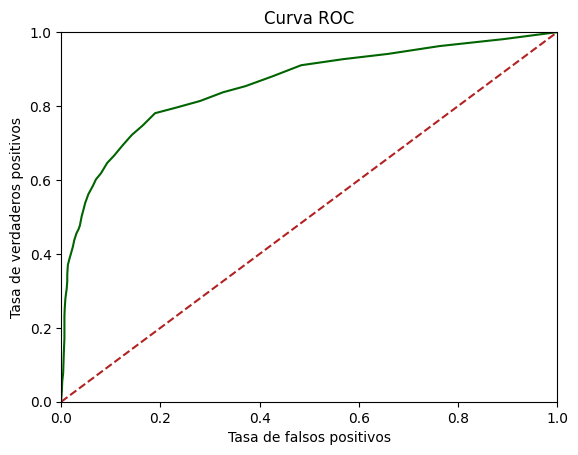

El f1_score del modelo en el conjunto de validación fue: 0.6017 con una (n_estimators = 27).
El score de la curva ROC de este modelo en el conjunto de validación es: 0.8556

CPU times: user 7.15 s, sys: 14 ms, total: 7.16 s
Wall time: 7.16 s


In [13]:
%%time
# Bosque aleatorio DESEQUILIBRADO

# Localizamos la mejor estimación con el mejor f1_score para nuestro bosque
best_score_forest = 0
best_est = 0
for est in range(1, 50): 
    model = RandomForestClassifier(random_state=random, n_estimators=est) 
    model.fit(features_train, target_train) 
    predicted_valid_forest = model.predict(features_valid)
    f1_score_forest = f1_score(target_valid, predicted_valid_forest)
    if f1_score_forest > best_score_forest:
        best_score_forest = f1_score_forest
        best_est = est

# Calculamos el roc_auc_score
probabilities_valid_forest = model.predict_proba(features_valid)
probabilities_one_valid_forest = probabilities_valid_forest[:, 1]
auc_roc_forest = roc_auc_score(target_valid, probabilities_one_valid_forest)

# Graficamos el comportamiento de la curva ROC
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid_forest)
plt.figure()
plt.plot(fpr,tpr, color='darkgreen')
plt.plot([0, 1], [0, 1], linestyle='--', color='firebrick')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.show()

f1_forest_des = best_score_forest.round(4)
auc_roc_forest_des = auc_roc_forest.round(4)

print("El f1_score del modelo en el conjunto de validación fue: {} con una (n_estimators = {}).".format(f1_forest_des, best_est))
print("El score de la curva ROC de este modelo en el conjunto de validación es:", auc_roc_forest_des)
print()

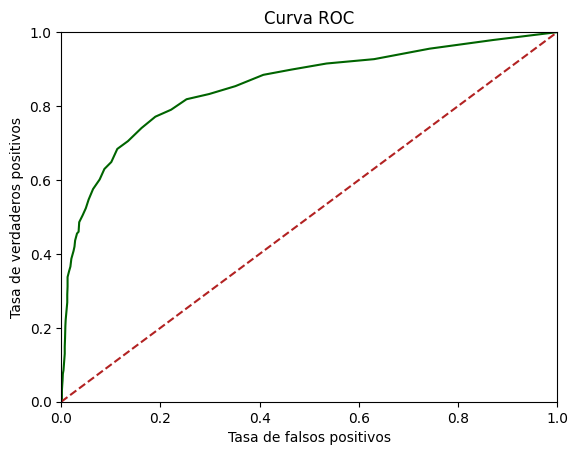

El f1_score del modelo en el conjunto de validación fue: 0.5732 con una (n_estimators = 25).
El score de la curva ROC de este modelo en el conjunto de validación es: 0.8537

CPU times: user 6.96 s, sys: 3.46 ms, total: 6.97 s
Wall time: 6.97 s


In [14]:
%%time
# Bosque aleatorio BALANCEADO

# Localizamos la mejor estimación con el mejor f1_score para nuestro bosque con class_weight='balanced'
best_score_forest = 0
best_est = 0
for est in range(1, 50): 
    model = RandomForestClassifier(random_state=random, n_estimators=est, class_weight='balanced') 
    model.fit(features_train, target_train) 
    predicted_valid_forest = model.predict(features_valid)
    f1_score_forest = f1_score(target_valid, predicted_valid_forest)
    if f1_score_forest > best_score_forest:
        best_score_forest = f1_score_forest
        best_est = est

# Calculamos el roc_auc_score
probabilities_valid_forest = model.predict_proba(features_valid)
probabilities_one_valid_forest = probabilities_valid_forest[:, 1]
auc_roc_forest = roc_auc_score(target_valid, probabilities_one_valid_forest)

# Graficamos el comportamiento de la curva ROC
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid_forest)
plt.figure()
plt.plot(fpr,tpr, color='darkgreen')
plt.plot([0, 1], [0, 1], linestyle='--', color='firebrick')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.show()

f1_forest_balanced = best_score_forest.round(4)
auc_roc_forest_balanced = auc_roc_forest.round(4)

print("El f1_score del modelo en el conjunto de validación fue: {} con una (n_estimators = {}).".format(f1_forest_balanced, best_est))
print("El score de la curva ROC de este modelo en el conjunto de validación es:", auc_roc_forest_balanced)
print()

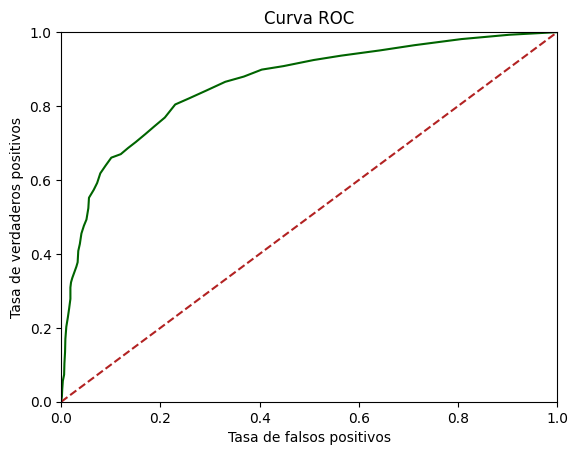

8
El f1_score del modelo en el conjunto de validación fue: 0.6273 con una (n_estimators = 49).
El score de la curva ROC de este modelo en el conjunto de validación es: 0.8592

CPU times: user 18 s, sys: 15.6 ms, total: 18 s
Wall time: 18 s


In [15]:
%%time
# Bosque aleatorio SOBREMUESTREO

# Buscamos el mejor 'repeat' para el bosque aleatorio
repeat_values_forest = [8, 9, 10, 11, 12, 13]
best_f1_forest = 0
best_repeat_forest = 1

for repeat_forest in repeat_values_forest:
    features_up, target_up = upsample(features_train, target_train, repeat_forest)
    model = RandomForestClassifier(random_state=random)
    model.fit(features_up, target_up)
    predicted = model.predict(features_valid)
    f1 = f1_score(target_valid, predicted)
    if f1 > best_f1_forest:
        best_f1_forest = f1
        best_repeat_forest = repeat_forest

# Creamos conjunto 'upsampled_forest'
features_upsampled_forest, target_upsampled_forest = upsample(features_train, target_train, best_repeat_forest)

# Localizamos la mejor estimación con el mejor f1_score para nuestro bosque
best_score_forest = 0
best_est = 0
for est in range(1, 50): 
    model = RandomForestClassifier(random_state=random, n_estimators=est) 
    model.fit(features_upsampled_forest, target_upsampled_forest) 
    predicted_valid_forest = model.predict(features_valid)
    f1_score_forest = f1_score(target_valid, predicted_valid_forest)
    if f1_score_forest > best_score_forest:
        best_score_forest = f1_score_forest
        best_est = est

# Calculamos el roc_auc_score
probabilities_valid_forest = model.predict_proba(features_valid)
probabilities_one_valid_forest = probabilities_valid_forest[:, 1]
auc_roc_forest = roc_auc_score(target_valid, probabilities_one_valid_forest)

# Graficamos el comportamiento de la curva ROC
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid_forest)
plt.figure()
plt.plot(fpr,tpr, color='darkgreen')
plt.plot([0, 1], [0, 1], linestyle='--', color='firebrick')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.show()

f1_forest_upsampled = best_score_forest.round(4)
auc_roc_forest_upsampled = auc_roc_forest.round(4)

print(best_repeat_forest)
print("El f1_score del modelo en el conjunto de validación fue: {} con una (n_estimators = {}).".format(f1_forest_upsampled, best_est))
print("El score de la curva ROC de este modelo en el conjunto de validación es:", auc_roc_forest_upsampled)
print()

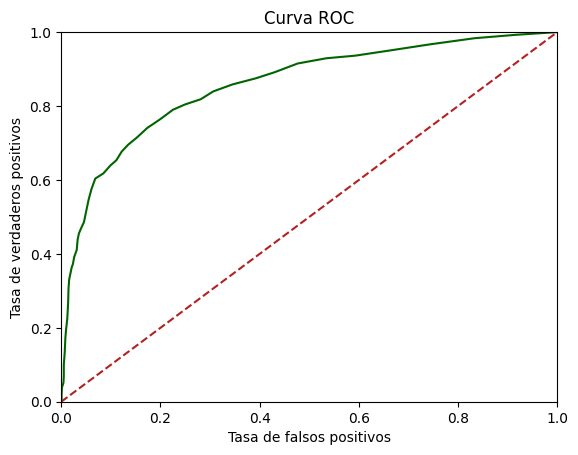

8
El f1_score del modelo en el conjunto de validación fue: 0.6245 con una (n_estimators = 49).
El score de la curva ROC de este modelo en el conjunto de validación es: 0.8568

CPU times: user 18.4 s, sys: 11.8 ms, total: 18.4 s
Wall time: 18.4 s


In [16]:
%%time
# Bosque aleatorio COMBINADO

# Buscamos el mejor 'repeat' para el bosque aleatorio
repeat_values_forest = [8, 9, 10, 11, 12, 13]
best_f1_forest = 0
best_repeat_forest = 1

for repeat_forest in repeat_values_forest:
    features_up, target_up = upsample(features_train, target_train, repeat_forest)
    model = RandomForestClassifier(random_state=random)
    model.fit(features_up, target_up)
    predicted = model.predict(features_valid)
    f1 = f1_score(target_valid, predicted)
    if f1 > best_f1_forest:
        best_f1_forest = f1
        best_repeat_forest = repeat_forest

# Creamos conjunto 'upsampled_forest' con class_weight='balanced'
features_upsampled_forest, target_upsampled_forest = upsample(features_train, target_train, best_repeat_forest)

# Localizamos la mejor estimación con el mejor f1_score para nuestro bosque
best_score_forest = 0
best_est = 0
for est in range(1, 50): 
    model = RandomForestClassifier(random_state=random, n_estimators=est, class_weight='balanced') 
    model.fit(features_upsampled_forest, target_upsampled_forest) 
    predicted_valid_forest = model.predict(features_valid)
    f1_score_forest = f1_score(target_valid, predicted_valid_forest)
    if f1_score_forest > best_score_forest:
        best_score_forest = f1_score_forest
        best_est = est

# Calculamos el roc_auc_score
probabilities_valid_forest = model.predict_proba(features_valid)
probabilities_one_valid_forest = probabilities_valid_forest[:, 1]
auc_roc_forest = roc_auc_score(target_valid, probabilities_one_valid_forest)

# Graficamos el comportamiento de la curva ROC
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid_forest)
plt.figure()
plt.plot(fpr,tpr, color='darkgreen')
plt.plot([0, 1], [0, 1], linestyle='--', color='firebrick')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.show()

print(best_repeat_forest)
f1_forest_combined = best_score_forest.round(4)
auc_roc_forest_combined = auc_roc_forest.round(4)

print("El f1_score del modelo en el conjunto de validación fue: {} con una (n_estimators = {}).".format(f1_forest_combined, best_est))
print("El score de la curva ROC de este modelo en el conjunto de validación es:", auc_roc_forest_combined)
print()

### Regresión lineal

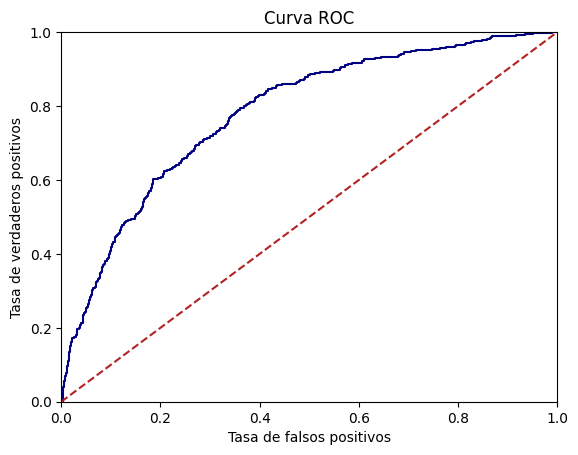

El f1_score del modelo en el conjunto de validación es: 0.2959
El score de la curva ROC de este modelo en el conjunto de validación es: 0.7811

CPU times: user 166 ms, sys: 280 ms, total: 446 ms
Wall time: 241 ms


In [17]:
%%time
# Regresión logística DESEQUILIBRADO

# Calculamos el f1_score
model = LogisticRegression(random_state=random, solver='liblinear')
model.fit(features_train, target_train)
predicted_valid_regression = model.predict(features_valid)
f1_score_regression = f1_score(target_valid, predicted_valid_regression)

# Calculamos el roc_auc_score
probabilities_valid_regression = model.predict_proba(features_valid)
probabilities_one_valid_regression = probabilities_valid_regression[:, 1]
auc_roc_regression = roc_auc_score(target_valid, probabilities_one_valid_regression)

# Graficamos el comportamiento de la curva ROC
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid_regression)
plt.figure()
plt.plot(fpr,tpr, color='navy')
plt.plot([0, 1], [0, 1], linestyle='--', color='firebrick')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.show()

f1_regression_des = f1_score_regression.round(4)
auc_roc_regression_des = auc_roc_regression.round(4)

print("El f1_score del modelo en el conjunto de validación es:", f1_regression_des)
print("El score de la curva ROC de este modelo en el conjunto de validación es:", auc_roc_regression_des)
print()

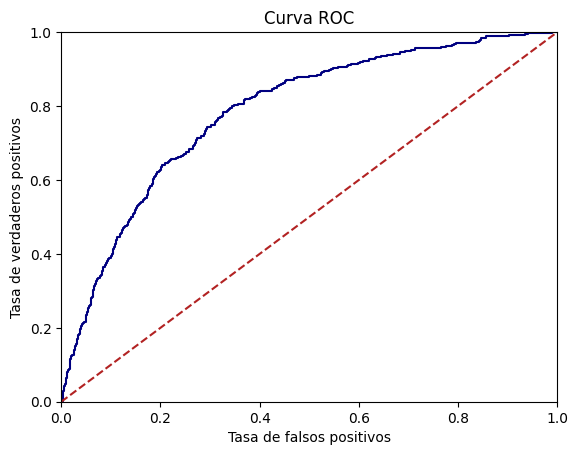

El f1_score del modelo en el conjunto de validación es: 0.5183
El score de la curva ROC de este modelo en el conjunto de validación es: 0.7849

CPU times: user 157 ms, sys: 236 ms, total: 393 ms
Wall time: 197 ms


In [18]:
%%time
# Regresión logística BALANCEADO

# Calculamos el f1_score con class_weight='balanced'
model = LogisticRegression(random_state=random, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid_regression = model.predict(features_valid)
f1_score_regression = f1_score(target_valid, predicted_valid_regression)

# Calculamos el roc_auc_score
probabilities_valid_regression = model.predict_proba(features_valid)
probabilities_one_valid_regression = probabilities_valid_regression[:, 1]
auc_roc_regression = roc_auc_score(target_valid, probabilities_one_valid_regression)

# Graficamos el comportamiento de la curva ROC
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid_regression)
plt.figure()
plt.plot(fpr,tpr, color='navy')
plt.plot([0, 1], [0, 1], linestyle='--', color='firebrick')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.show()

f1_regression_balanced = f1_score_regression.round(4)
auc_roc_regression_balanced = auc_roc_regression.round(4)

print("El f1_score del modelo en el conjunto de validación es:", f1_regression_balanced)
print("El score de la curva ROC de este modelo en el conjunto de validación es:", auc_roc_regression_balanced)
print()

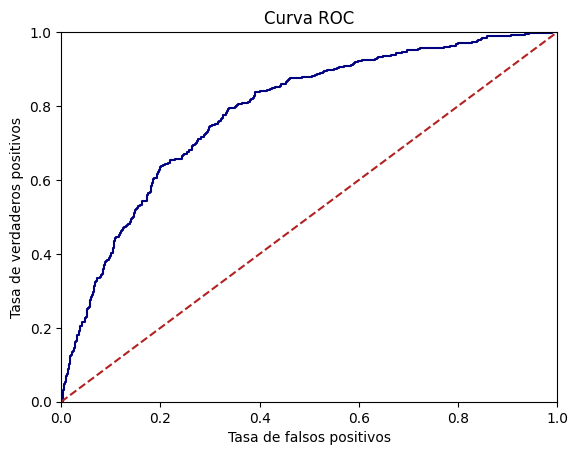

El f1_score del modelo en el conjunto de validación es: 0.5263
El score de la curva ROC de este modelo en el conjunto de validación es: 0.7845

CPU times: user 473 ms, sys: 1.13 s, total: 1.6 s
Wall time: 809 ms


In [19]:
%%time
# Regresión logística SOBREMUESTREO

# Buscamos el mejor 'repeat' para el árbol de decisión
repeat_values_regression = [1, 2, 3, 4, 5, 6]
best_f1_regression = 0
best_repeat_regression = 1

for repeat_regression in repeat_values_regression:
    features_up, target_up = upsample(features_train, target_train, repeat_regression)
    model = LogisticRegression(random_state=random)
    model.fit(features_up, target_up)
    predicted = model.predict(features_valid)
    f1 = f1_score(target_valid, predicted)
    if f1 > best_f1_regression:
        best_f1_regression = f1
        best_repeat_regression = repeat_regression

# Creamos conjunto 'upsampled_forest'
features_upsampled_regression, target_upsampled_regression = upsample(features_train, target_train, best_repeat_regression)

# Calculamos el f1_score
model = LogisticRegression(random_state=random, solver='liblinear')
model.fit(features_upsampled_regression, target_upsampled_regression)
predicted_valid_regression = model.predict(features_valid)
f1_score_regression = f1_score(target_valid, predicted_valid_regression)

# Calculamos el roc_auc_score
probabilities_valid_regression = model.predict_proba(features_valid)
probabilities_one_valid_regression = probabilities_valid_regression[:, 1]
auc_roc_regression = roc_auc_score(target_valid, probabilities_one_valid_regression)

# Graficamos el comportamiento de la curva ROC
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid_regression)
plt.figure()
plt.plot(fpr,tpr, color='navy')
plt.plot([0, 1], [0, 1], linestyle='--', color='firebrick')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.show()

f1_regression_upsampled = f1_score_regression.round(4)
auc_roc_regression_upsampled = auc_roc_regression.round(4)

print("El f1_score del modelo en el conjunto de validación es:", f1_regression_upsampled)
print("El score de la curva ROC de este modelo en el conjunto de validación es:", auc_roc_regression_upsampled)
print()

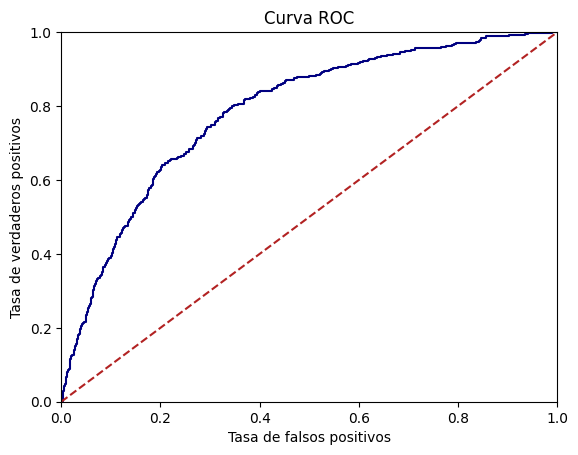

El f1_score del modelo en el conjunto de validación es: 0.5183
El score de la curva ROC de este modelo en el conjunto de validación es: 0.785

CPU times: user 525 ms, sys: 1.33 s, total: 1.85 s
Wall time: 960 ms


In [20]:
%%time
# Regresión logística COMBINADO

# Buscamos el mejor 'repeat' para el árbol de decisión
repeat_values_regression = [1, 2, 3, 4, 5, 6]
best_f1_regression = 0
best_repeat_regression = 1

for repeat_regression in repeat_values_regression:
    features_up, target_up = upsample(features_train, target_train, repeat_regression)
    model = LogisticRegression(random_state=random)
    model.fit(features_up, target_up)
    predicted = model.predict(features_valid)
    f1 = f1_score(target_valid, predicted)
    if f1 > best_f1_regression:
        best_f1_regression = f1
        best_repeat_regression = repeat_regression

# Creamos conjunto 'upsampled_forest'
features_upsampled_regression, target_upsampled_regression = upsample(features_train, target_train, best_repeat_regression)

# Calculamos el f1_score con class_weight='balanced'
model = LogisticRegression(random_state=random, solver='liblinear', class_weight='balanced')
model.fit(features_upsampled_regression, target_upsampled_regression)
predicted_valid_regression = model.predict(features_valid)
f1_score_regression = f1_score(target_valid, predicted_valid_regression)

# Calculamos el roc_auc_score
probabilities_valid_regression = model.predict_proba(features_valid)
probabilities_one_valid_regression = probabilities_valid_regression[:, 1]
auc_roc_regression = roc_auc_score(target_valid, probabilities_one_valid_regression)

# Graficamos el comportamiento de la curva ROC
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid_regression)
plt.figure()
plt.plot(fpr,tpr, color='navy')
plt.plot([0, 1], [0, 1], linestyle='--', color='firebrick')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.show()

f1_regression_combined = f1_score_regression.round(4)
auc_roc_regression_combined = auc_roc_regression.round(4)

print("El f1_score del modelo en el conjunto de validación es:", f1_regression_combined)
print("El score de la curva ROC de este modelo en el conjunto de validación es:", auc_roc_regression_combined)
print()

### Tabla de resultados

In [21]:
print()
print(f'random_state={random}')
print('                        F1         AUC      Tiempo     >0.59')
print('Árbol de decisión')
print(f'Desequilibrado:       {f1_tree_des*100}%      {auc_roc_tree_des*100}%     473ms     Aprobado')
print(f'Balanceado:           {(f1_tree_balanced*100).round(2)}%     {auc_roc_tree_balanced*100}%     487ms     Aprobado')
print(f'Sobremuestreo:        {(f1_tree_upsampled*100).round(2)}%     {auc_roc_tree_upsampled*100}%     865ms     Aprobado')
print(f'Combinado:            {f1_tree_combined*100}%     {auc_roc_tree_combined*100}%     895ms     Aprobado')
print()
print('Bosque aleatorio')
print(f'Desequilibrado:       {f1_forest_des*100}%     {auc_roc_forest_des*100}%     7.23s     Aprobado')
print(f'Balanceado:           {(f1_forest_balanced*100).round(2)}%     {(auc_roc_forest_balanced*100).round(2)}%     7.06s     Reprobado')
print(f'Sobremuestreo:        {f1_forest_upsampled*100}%     {(auc_roc_forest_upsampled*100).round(2)}%     18.2s     Aprobado')
print(f'Combinado:            {(f1_forest_combined*100).round(2)}%     {(auc_roc_forest_combined*100).round(2)}%     18.6s     Aprobado')
print()
print('Regresión lineal')
print(f'Desequilibrado:       {f1_regression_des*100}%     {auc_roc_regression_des*100}%     428ms     Reprobado')
print(f'Balanceado:           {f1_regression_balanced*100}%     {(auc_roc_regression_balanced*100).round(2)}%     413ms     Reprobado')
print(f'Sobremuestreo:        {(f1_regression_upsampled*100).round(2)}%     {auc_roc_regression_upsampled*100}%     1.53s     Reprobado')
print(f'Combinado:            {f1_regression_combined*100}%     {auc_roc_regression_combined*100}%      1.59s     Reprobado')
print()


random_state=23451
                        F1         AUC      Tiempo     >0.59
Árbol de decisión
Desequilibrado:       60.3%      69.75%     473ms     Aprobado
Balanceado:           60.98%     70.35%     487ms     Aprobado
Sobremuestreo:        60.19%     69.54%     865ms     Aprobado
Combinado:            61.17%     70.66%     895ms     Aprobado

Bosque aleatorio
Desequilibrado:       60.17%     85.56%     7.23s     Aprobado
Balanceado:           57.32%     85.37%     7.06s     Reprobado
Sobremuestreo:        62.73%     85.92%     18.2s     Aprobado
Combinado:            62.45%     85.68%     18.6s     Aprobado

Regresión lineal
Desequilibrado:       29.59%     78.11%     428ms     Reprobado
Balanceado:           51.83%     78.49%     413ms     Reprobado
Sobremuestreo:        52.63%     78.45%     1.53s     Reprobado
Combinado:            51.83%     78.5%      1.59s     Reprobado



#### Conclusiones

**Equilibrio de clases**
- Desequilibradas:
  - El desequilibrio de clases real tiene una relación de 80:20, esta no afectó tanto el 'f1 score' del bosque aleatorio ni del árbol de decisión, sin embargo, la regresión lineal se ve muy afectada por el sesgo lineal hacia la clase mayoritaria.
  - El AUC score no sufrió variación significativa.
- Equilibradas:
  - La variación entre cada enfoque por modelo no cambia significativamente, no varía por más de 1% exceptuando el enfoque blanceado en el 'bosque aleatorio' que lo pasa por poco más del 2% con el enfoque próximo.

**Modelos aprobados**
- Árbol de decisión: 4 modelos aprobados (Desequilibrio, Balanceado, Sobremuestreo y Combinado).
- Bosque aleatorio: 3 modelos aprobados (Desequilibrio, Sobremuestreo y Combinado).
- Regresión lineal: 0 modelos aprobados.

**Modelo elegido**
- **Bosque aleatorio con submuestreo**, es el que posée calificaciones más altas con **f1 score de 62.73%** y un **AUC score de 85.92%**, es cierto que este modelo es de los que más tarda en entrenarse con un **tiempo de 18.2s** pero como solo tarda eso en entrenarse es completamente aceptable. 

## Prueba del modelo final

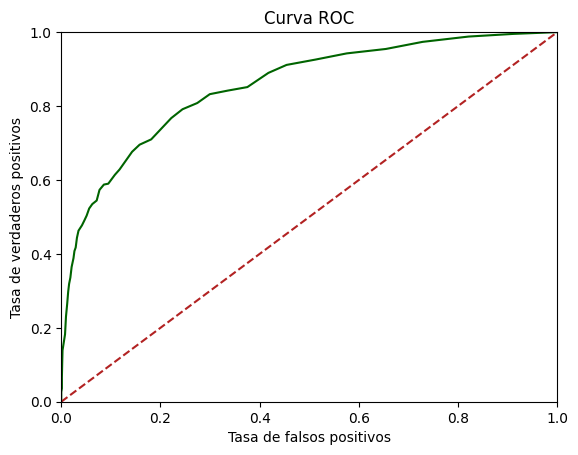


Random_state= 23451
Mejor repeat": 8
El f1_score del modelo en el conjunto de prueba final es: 0.5997357992073975 con una (n_estimators = 49).
El score de la curva ROC de este modelo en el conjunto de prueba final es: 0.8530110844994251

CPU times: user 570 ms, sys: 3.82 ms, total: 574 ms
Wall time: 573 ms


In [22]:
%%time
# Bosque aleatorio FINAL (Sobremuestreo) 

# Parámetros mejor modelo
best_repeat_final = 8
best_est_final = 49

# Enfoque de sobremuestreo
features_upsampled_final, target_upsampled_final = upsample(features_train, target_train, best_repeat_final)

# Ejecución mejor modelo
best_model = RandomForestClassifier(random_state=random, n_estimators=best_est_final) 
best_model.fit(features_upsampled_final, target_upsampled_final) 
predicted_test = best_model.predict(features_test)
f1_score_final = f1_score(target_test, predicted_test)

# Calculamos el roc_auc_score
probabilities_test_final = best_model.predict_proba(features_test)
probabilities_one_test_final = probabilities_test_final[:, 1]
auc_roc_final = roc_auc_score(target_test, probabilities_one_test_final)

# Graficamos el comportamiento de la curva ROC
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test_final)
plt.figure()
plt.plot(fpr,tpr, color='darkgreen')
plt.plot([0, 1], [0, 1], linestyle='--', color='firebrick')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.show()

print()
print(f'Random_state= {random}')
print(f'Mejor repeat": {best_repeat_final}')
print("El f1_score del modelo en el conjunto de prueba final es: {} con una (n_estimators = {}).".format(f1_score_final, best_est_final))
print("El score de la curva ROC de este modelo en el conjunto de prueba final es:", auc_roc_final)
print()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Entrenaste correctamente los modelos teniendo en cuenta el desequilibrio de clases. Ademeas usas diferentes sets de hiperparámetros para elegir los que mejor se ajustaran a los datos.

Esto lo complementaa con la gráfica ROC para evaluar el rendimiento del modelo. Este tipo de visualización permite comparar de forma efectiva distintos clasificadores y elegir el más adecuado.
</div>

  
Conclusión prueba final:
- Logramos un **score f1 de 59.97%** lo cual indica un balance razonable entre el recall y la precisión.
- Encontramos un excelente **AUC score de 85.30%**, esto nos habla de la gran capacidad que tiene nuestro modelo para poder distinguir los clientes que se quedaran de los que abandonaran.


## Conclusión
---

Logramos construir un modelo con buena probabilidad que pueda predecir cuales clientes quieren abandonar el banco, con esta información el banco ya tiene las herramientas para poder idear un plan para lograr retener al mayor número de clientes.